# Cuando la precisión no es suficiente: Optimizando la clasificación con el enfoque basado en costos

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
sns.set_style('darkgrid')

- `numpy` y `pandas` son bibliotecas para manipulación de datos y cálculos numéricos.
- `matplotlib.pyplot` es una biblioteca para visualización de datos en Python.
- `make_classification` es una función de sklearn que permite generar un conjunto de datos de clasificación sintético para pruebas.
- `train_test_split` es una función de sklearn para dividir un conjunto de datos en conjuntos de entrenamiento y prueba.
- `RandomForestClassifier` es una clase de sklearn que implementa el algoritmo de Bosques Aleatorios para clasificación.
- `roc_curve`, `roc_auc_score`, `accuracy_score`, `precision_score`, `recall_score`, `f1_score` y `confusion_matrix` son funciones de sklearn para evaluar el rendimiento del modelo.


In [64]:
# Generar datos desbalanceados
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Entrenar un modelo de clasificación
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

En este código se realiza lo siguiente:

### Generar datos desbalanceados
Se generan datos de clasificación sintéticos con la función `make_classification`. El argumento `n_samples` indica el número total de muestras, `n_features` especifica el número de características, `n_classes` indica el número de clases y `weights` se utiliza para controlar el desbalance de clases, donde `[0.9, 0.1]` indica que la primera clase tiene el 90% de las muestras y la segunda el 10%.

### Dividir datos en entrenamiento y prueba
Los datos generados se dividen en conjuntos de entrenamiento y prueba utilizando la función `train_test_split`. La proporción de datos de prueba se establece en un 10% (`test_size=0.1`).

### Entrenar un modelo de clasificación
Se instancia un modelo de Bosques Aleatorios con 100 árboles (`n_estimators=100`) y se entrena con los datos de entrenamiento utilizando el método `fit`.



In [65]:
# Predecir probabilidades en el conjunto de prueba
probs = model.predict_proba(X_test)
probs = probs[:, 1]  # Probabilidad de pertenecer a la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, probs)


En este bloque de código se realiza lo siguiente:

### Predecir probabilidades en el conjunto de prueba
Se utilizan las probabilidades predichas por el modelo en el conjunto de prueba utilizando el método `predict_proba`. Se extraen las probabilidades asociadas a la clase positiva (etiqueta 1) utilizando `probs[:, 1]`.

### Calcular la curva ROC
Se calculan las tasas de falsos positivos (FPR) y verdaderos positivos (TPR) utilizando la función `roc_curve` de scikit-learn. Estas tasas se utilizan para trazar la curva ROC.

### Calcular el área bajo la curva ROC (AUC)
Se calcula el área bajo la curva ROC (AUC) utilizando la función `roc_auc_score` de scikit-learn. El valor de AUC proporciona una medida de la calidad del modelo en términos de su capacidad para distinguir entre las clases positiva y negativa.


In [66]:
# Calcular otras métricas de evaluación de clasificación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
thresholds[0]=1

En este bloque de código se calculan varias métricas de evaluación de clasificación:

### Predicción y evaluación del modelo
Se realizan predicciones sobre el conjunto de prueba utilizando el método `predict` del modelo entrenado. Luego se calculan las siguientes métricas:

- **Exactitud (Accuracy):** Se calcula utilizando la función `accuracy_score`. Representa la fracción de predicciones correctas realizadas por el modelo.
  
- **Precisión (Precision):** Se calcula utilizando la función `precision_score`. Representa la proporción de verdaderos positivos sobre todos los casos predichos como positivos.
  
- **Recuperación (Recall):** Se calcula utilizando la función `recall_score`. Representa la proporción de verdaderos positivos sobre todos los casos positivos reales.
  
- **Puntuación F1 (F1 Score):** Se calcula utilizando la función `f1_score`. Es la media armónica de precisión y recuperación, proporcionando un equilibrio entre ambas métricas.
  
- **Matriz de Confusión:** Se calcula utilizando la función `confusion_matrix`. Es una tabla que muestra las predicciones del modelo frente a los valores reales y ayuda a evaluar el rendimiento en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

Estas métricas proporcionan una visión completa del rendimiento del modelo de clasificación, evaluando aspectos como la precisión, la exhaustividad y el equilibrio entre ellas. La matriz de confusión también es útil para comprender cómo el modelo clasifica correctamente y incorrectamente las diferentes clases.






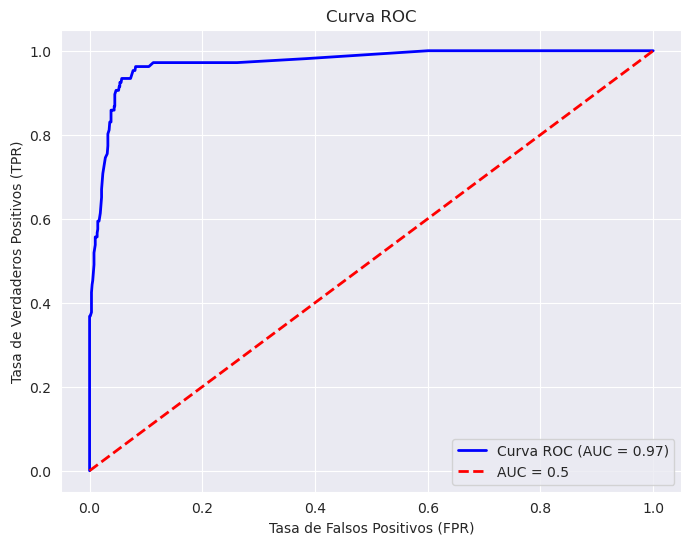

In [67]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='AUC = 0.5')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

En este bloque de código se grafica la curva ROC para visualizar el rendimiento del modelo de clasificación:

### Graficar la curva ROC
Se utiliza la función `plt.figure(figsize=(8, 6))` para crear una figura con un tamaño específico. Luego, se traza la curva ROC utilizando los datos de la tasa de falsos positivos (FPR) en el eje x y la tasa de verdaderos positivos (TPR) en el eje y, con la función `plt.plot`. Se establece el color de la curva en azul (`color='blue'`) y su grosor en 2 (`lw=2`). Se etiqueta la curva con su valor de AUC utilizando el método `format` para formatear el texto.

Además, se traza la línea de referencia de AUC 0.5, que representa un modelo aleatorio, utilizando la función `plt.plot` con color rojo (`color='red'`) y estilo de línea discontinuo (`linestyle='--'`). 

Se añaden etiquetas a los ejes x e y con `plt.xlabel` y `plt.ylabel`, respectivamente. Se agrega un título a la gráfica con `plt.title`. Se muestra una leyenda con información sobre la curva ROC y la línea de referencia de AUC 0.5 utilizando `plt.legend`, ubicada en la esquina inferior derecha (`loc='lower right'`). Finalmente, se muestra la gráfica con `plt.show()`.


In [68]:
datos_prueba = {
    "Métrica": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Valor": [accuracy, precision, recall, f1]
}

# Crear un DataFrame con las métricas
df = pd.DataFrame(datos_prueba,index=datos_prueba['Métrica'])

# Crear DataFrame a partir de la matriz de confusión
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Actual Positivo','Actual Negativo'], columns=['Predicción Positiva','Predicción Negativa'])


En este bloque de código se realizan las siguientes acciones:

### Crear un DataFrame con las métricas de evaluación

Se crea un diccionario llamado `datos_prueba` que contiene dos listas: "Métrica" con los nombres de las métricas de evaluación y "Valor" con los valores calculados previamente (`accuracy`, `precision`, `recall` y `f1`). Luego se utiliza este diccionario para crear un DataFrame utilizando la función `pd.DataFrame`, donde `index=datos_prueba['Métrica']` se establece para que los nombres de las métricas se utilicen como índices del DataFrame.

### Crear un DataFrame a partir de la matriz de confusión

Se crea un DataFrame llamado `df_conf_matrix` a partir de la matriz de confusión `conf_matrix`, donde las etiquetas de fila son "Actual Negativo" y "Actual Positivo", y las etiquetas de columna son "Predicción Negativa" y "Predicción Positiva".



In [69]:
# Mostramos las métricas
np.round(df,2)

,Métrica,Valor
Accuracy,Accuracy,0.95
Precision,Precision,0.78
Recall,Recall,0.69
F1-Score,F1-Score,0.73


In [70]:
# Mostramos la matriz de confusión
df_conf_matrix

,Predicción Positiva,Predicción Negativa
Actual Positivo,874,20
Actual Negativo,33,73


A partir de la matriz de confusión proporcionada:

|               | Predicción Positiva | Predicción Negativa |
|---------------|---------------------|---------------------|
| Actual Positivo | 874 (Verdaderos Positivos) | 20 (Falsos Negativos) |
| Actual Negativo | 33 (Falsos Positivos) | 73 (Verdaderos Negativos) |

Podemos extraer las siguientes inferencias:

- **Verdaderos Positivos (VP):** Hay 874 casos que fueron clasificados correctamente como positivos. Estos son clientes que cumplen con los criterios para el crédito y fueron correctamente identificados como elegibles.
  
- **Falsos Negativos (FN):** Hay 20 casos que fueron clasificados incorrectamente como negativos. Estos son clientes que en realidad cumplen con los criterios para el crédito pero fueron clasificados erróneamente como no elegibles, lo que podría llevar a la pérdida de oportunidades de crédito.

- **Falsos Positivos (FP):** Hay 33 casos que fueron clasificados incorrectamente como positivos. Estos son clientes que en realidad no cumplen con los criterios para el crédito pero fueron clasificados erróneamente como elegibles, lo que podría llevar a riesgos financieros para la institución crediticia.

- **Verdaderos Negativos (VN):** Hay 73 casos que fueron clasificados correctamente como negativos. Estos son clientes que no cumplen con los criterios para el crédito y fueron correctamente identificados como no elegibles.

La interpretación de esta matriz de confusión muestra que los casos clasificados como "Positivos" son aquellos que cumplen con los criterios para el crédito, mientras que los casos clasificados como "Negativos" son aquellos que no cumplen con los criterios.


Es importante conocer los costos asociados tanto a los falsos positivos como a los falsos negativos en el contexto de la clasificación de créditos debido a las implicaciones financieras y de riesgo que conllevan. Aquí hay algunas razones que respaldan esta afirmación:

1. **Impacto financiero:** Tanto los falsos positivos como los falsos negativos tienen un impacto financiero directo en la institución crediticia. Los falsos positivos pueden llevar a otorgar créditos a clientes que no cumplen con los criterios de elegibilidad, lo que aumenta el riesgo de incumplimiento y pérdidas financieras. Por otro lado, los falsos negativos pueden resultar en la pérdida de oportunidades de negocio al rechazar a clientes potenciales que cumplen con los criterios y podrían ser buenos pagadores.

2. **Reputación:** Los falsos positivos pueden dañar la reputación de la institución crediticia al otorgar créditos a personas que luego no pueden cumplir con sus obligaciones, lo que puede afectar la confianza de los clientes y los inversionistas. Por otro lado, los falsos negativos pueden generar frustración en clientes potenciales que fueron rechazados injustamente, lo que también puede dañar la reputación de la institución.

3. **Cumplimiento regulatorio:** Los errores en la clasificación de créditos pueden tener implicaciones regulatorias, especialmente en entornos donde existen normativas estrictas para la concesión de créditos, como verificar el riesgo crediticio y prevenir el lavado de dinero. Los falsos positivos podrían resultar en multas por otorgar créditos de manera indebida, mientras que los falsos negativos podrían resultar en multas por discriminación o prácticas crediticias injustas.

4. **Optimización de recursos:** Conocer los costos asociados a los errores de clasificación permite optimizar los recursos de la institución crediticia. Si los costos de los falsos positivos son significativamente más altos que los de los falsos negativos, la institución puede priorizar la reducción de los falsos positivos, por ejemplo, ajustando los criterios de elegibilidad de manera más estricta o utilizando modelos de clasificación más precisos.

Por lo tanto, es fundamental incorporar los costos asociados a los errores de clasificación en la ecuación al evaluar el rendimiento de un modelo de clasificación en el contexto bancario. No solo debemos considerar las métricas de clasificación estándar y la curva ROC, sino también analizar cómo esos costos influyen en la selección del umbral de corte óptimo que maximizaría la utilidad del banco.

Al incluir los costos asociados a los falsos positivos y los falsos negativos, podemos obtener una evaluación más completa y realista del rendimiento del modelo de clasificación. Por ejemplo, los costos de un falso positivo podrían incluir el monto del crédito otorgado, los intereses no cobrados, los gastos administrativos y los costos asociados al recupero de la deuda. Por otro lado, los costos de un falso negativo podrían incluir la pérdida de ingresos por intereses y tarifas, así como la posible pérdida de la relación a largo plazo con el cliente.

Al considerar estos costos en la evaluación del modelo, podemos determinar el umbral de corte óptimo que equilibre los costos de los falsos positivos y falsos negativos. Este umbral de corte puede variar según las preferencias y objetivos específicos del banco. Por ejemplo, si el banco desea minimizar el riesgo de incumplimiento de los clientes, puede optar por un umbral de corte que minimice los falsos positivos, incluso a costa de un mayor número de falsos negativos. Por otro lado, si el banco busca maximizar el volumen de créditos otorgados, puede seleccionar un umbral de corte que minimice los falsos negativos, aunque esto implique un mayor riesgo de incumplimiento.

In [75]:
def costo_financiero_total(threshhold,costo_falsos_positivos=10,costo_falsos_negativos=5):
    yp=np.where(probs>threshhold,1,0)
    cma = confusion_matrix(y_test, yp)
    costo_de_incumplidores=cma[1,0] * costo_falsos_positivos
    costo_mal_clasificados=cma[0,1] * costo_falsos_negativos
    total_costo=costo_de_incumplidores+costo_mal_clasificados
    return [total_costo,costo_de_incumplidores,costo_mal_clasificados]

Esta función, `costo_financiero_total`, calcula el costo financiero total asociado a un determinado umbral de corte (`threshold`) utilizado para clasificar las probabilidades predichas por un modelo. Aquí está su explicación:

1. **Parámetros de entrada:**
   - `threshold`: Umbral de corte utilizado para clasificar las probabilidades predichas por el modelo. Se utiliza para determinar si una instancia se clasifica como positiva o negativa.
   - `costo_falsos_positivos`: Costo asociado a cada falso positivo. Es el costo financiero de clasificar incorrectamente una instancia como positiva cuando en realidad es negativa.
   - `costo_falsos_negativos`: Costo asociado a cada falso negativo. Es el costo financiero de clasificar incorrectamente una instancia como negativa cuando en realidad es positiva.

2. **Cálculo de las predicciones:**
   Se utilizan las probabilidades predichas (`probs`) y el umbral de corte proporcionado para clasificar las instancias como positivas o negativas. Se utiliza `np.where` para asignar etiquetas binarias (`1` para positivas y `0` para negativas) basadas en si la probabilidad predicha es mayor que el umbral de corte.

3. **Cálculo de la matriz de confusión:**
   Se calcula la matriz de confusión (`cma`) utilizando las etiquetas verdaderas (`y_test`) y las predicciones binarias obtenidas en el paso anterior.

4. **Cálculo del costo de incumplimiento:**
   Se calcula el costo de incumplimiento multiplicando el número de falsos positivos (instancias negativas incorrectamente clasificadas como positivas) en la matriz de confusión por el costo asociado a los falsos positivos (`costo_falsos_positivos`).

5. **Cálculo del costo de mal clasificación de un cliente cumplidor:**
   Se calcula el costo de mal clasificación de un cliente cumplidor multiplicando el número de falsos negativos (instancias positivas incorrectamente clasificadas como negativas) en la matriz de confusión por el costo asociado a los falsos negativos (`costo_falsos_negativos`).

6. **Cálculo del costo financiero total:**
   Se suma el costo de incumplimiento y el costo de mal clasificación de un cliente que cumple para obtener el costo financiero total (`total_costo`).

7. **Resultado:**
   Se devuelve el costo financiero total como resultado de la función.

La función permite calcular el costo financiero total asociado a un determinado umbral de corte en la clasificación de probabilidades predichas por un modelo, teniendo en cuenta los costos de los falsos positivos y falsos negativos.

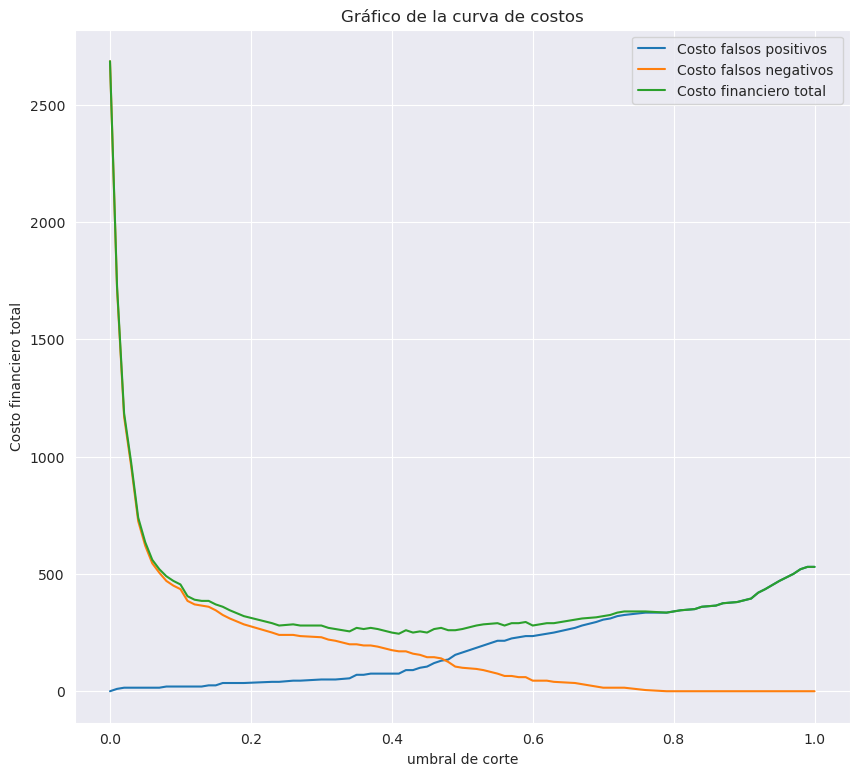

In [91]:
# Primer caso : Cuando el costo de inculplimiento es igual al costo de perder un cliente
costo_bancario_total= [[costo_financiero_total(i,5,5)[z] for i in thresholds] for z in range(3)]
costo_bancario_total= np.array(costo_bancario_total)
#costo_bancario_total=[costo_financiero_total(i,50,5) for i in thresholds]
# Graficar la función
plt.figure(figsize=(10, 9))
plt.plot(thresholds, costo_bancario_total[1], label='Costo falsos positivos ')
plt.plot(thresholds, costo_bancario_total[2], label='Costo falsos negativos ')

plt.plot(thresholds, costo_bancario_total[0], label='Costo financiero total ')

#plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Pinta el área bajo la curva
plt.xlabel('umbral de corte')
plt.ylabel('Costo financiero total')
plt.title('Gráfico de la curva de costos')
plt.grid(True)
plt.legend()
plt.show()

# La ordenada correspondiente a la abcisa 0 del eje x corresponde a la politica más estricta de control. 
# La ordenada correspondiente a la abcisa 1 del eje x corresponde a la politica más permisiva.

In [93]:
Umbrales_de_costos= pd.concat([ pd.DataFrame(costo_bancario_total[0],columns=['Costo financiero total ']),pd.DataFrame(thresholds,columns=['Umbrales de corte'])],axis=1)

In [94]:
Umbrales_de_costos

,Costo financiero total,Umbrales de corte
0,530,1.00
1,530,0.99
2,520,0.98
3,500,0.97
4,470,0.95
...,...,...
70,740,0.04
71,975,0.03
72,1185,0.02
73,1725,0.01


In [100]:
# Encontramos el costo mínimo
Umbrales_de_costos['Costo financiero total '].min()

245

In [102]:
# Encontramos el umbral óptimo de corte en el que se logra el costo mínimo
Umbrales_de_costos[Umbrales_de_costos['Costo financiero total ']==245]

,Costo financiero total,Umbrales de corte
42,245,0.41


In [147]:
# Calcular métricas de evaluación de clasificación para el umbral óptimo según el esquema de costos del ejemplo
threshhold = 0.41
y_pred =np.where(probs>threshhold,1,0)
#y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
#thresholds[0]=1

In [148]:
datos_prueba = {
    "Métrica": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Valor": [accuracy, precision, recall, f1]
}

# Crear un DataFrame con las métricas
df = pd.DataFrame(datos_prueba,index=datos_prueba['Métrica'])

# Crear DataFrame a partir de la matriz de confusión
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Actual Positivo','Actual Negativo'], columns=['Predicción Positiva','Predicción Negativa'])

In [104]:
datos_prueba = {
    "Métrica": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Valor": [accuracy, precision, recall, f1]
}

# Crear un DataFrame con las métricas
df = pd.DataFrame(datos_prueba,index=datos_prueba['Métrica'])

# Crear DataFrame a partir de la matriz de confusión
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Actual Positivo','Actual Negativo'], columns=['Predicción Positiva','Predicción Negativa'])


In [149]:
# Mostramos las métricas
np.round(df,2)

,Métrica,Valor
Accuracy,Accuracy,0.95
Precision,Precision,0.73
Recall,Recall,0.86
F1-Score,F1-Score,0.79


In [150]:
# Mostramos la matriz de confusión
df_conf_matrix

,Predicción Positiva,Predicción Negativa
Actual Positivo,860,34
Actual Negativo,15,91


Este código realiza lo siguiente:

1. **Cálculo del costo financiero total para diferentes umbrales de corte:**
   Utilizando la función `costo_financiero_total`, se calcula el costo financiero total para una serie de umbrales de corte (`thresholds`). Se establece que tanto el costo de incumplimiento como el costo de perder un cliente son iguales, lo que significa que el costo asociado a un falso positivo es igual al costo asociado a un falso negativo. Estos costos se aplican a través de la función `costo_financiero_total`, que toma el umbral de corte actual (`i`), y devuelve el costo financiero total para ese umbral de corte.

2. **Graficar la función:**
   Se traza un gráfico de la función de costo financiero total en función del umbral de corte utilizando `plt.plot`. Los umbrales de corte se colocan en el eje x y los costos financieros totales se colocan en el eje y. La función `plt.xlabel`, `plt.ylabel` y `plt.title` se utilizan para etiquetar los ejes y dar un título al gráfico.

3. **Interpretación del gráfico:**
   - La ordenada correspondiente a la abscisa 0 del eje x representa la política más estricta de control, donde se minimizan los falsos positivos a expensas de tener más falsos negativos. 
   - La ordenada correspondiente a la abscisa 1 del eje x representa la política más permisiva, donde se permiten más falsos positivos para evitar falsos negativos. 

En resumen, este código genera un gráfico que muestra cómo varía el costo financiero total en función del umbral de corte utilizado para clasificar las instancias. Ayuda a comprender cómo diferentes políticas de control, definidas por el umbral de corte, pueden afectar el costo financiero total en el contexto bancario, donde se valora el equilibrio entre los costos de incumplimiento y los costos de perder clientes.


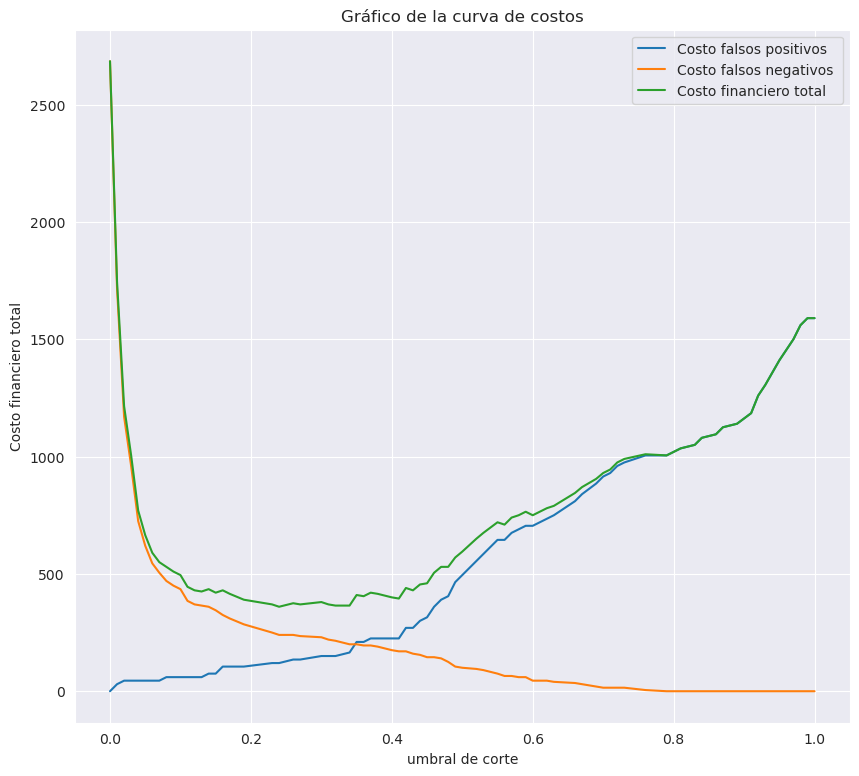

In [120]:
# Segundo caso : Cuando el costo de inculplimiento es tres veces el costo de perder un cliente
costo_bancario_total= [[costo_financiero_total(i,15,5)[z] for i in thresholds] for z in range(3)]
costo_bancario_total= np.array(costo_bancario_total)
#costo_bancario_total=[costo_financiero_total(i,50,5) for i in thresholds]
# Graficar la función
plt.figure(figsize=(10, 9))
plt.plot(thresholds, costo_bancario_total[1], label='Costo falsos positivos ')
plt.plot(thresholds, costo_bancario_total[2], label='Costo falsos negativos ')

plt.plot(thresholds, costo_bancario_total[0], label='Costo financiero total ')

#plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Pinta el área bajo la curva
plt.xlabel('umbral de corte')
plt.ylabel('Costo financiero total')
plt.title('Gráfico de la curva de costos')
plt.grid(True)
plt.legend()
plt.show()

# La ordenada correspondiente a la abcisa 0 del eje x corresponde a la politica más estricta de control. 
# La ordenada correspondiente a la abcisa 1 del eje x corresponde a la politica más permisiva.

In [121]:
Umbrales_de_costos= pd.concat([ pd.DataFrame(costo_bancario_total[0],columns=['Costo financiero total ']),pd.DataFrame(thresholds,columns=['Umbrales de corte'])],axis=1)

In [133]:
Umbrales_de_costos

,Costo financiero total,Umbrales de corte
0,1590,1.00
1,1590,0.99
2,1560,0.98
3,1500,0.97
4,1410,0.95
...,...,...
70,770,0.04
71,1005,0.03
72,1215,0.02
73,1745,0.01


In [123]:
# Encontramos el costo mínimo
Umbrales_de_costos['Costo financiero total '].min()

360

In [124]:
# Encontramos el umbral óptimo de corte en el que se logra el costo mínimo
Umbrales_de_costos[Umbrales_de_costos['Costo financiero total ']==360]

,Costo financiero total,Umbrales de corte
54,360,0.24


In [151]:
# Calcular métricas de evaluación de clasificación para el umbral óptimo según el esquema de costos del ejemplo
threshhold = 0.24
y_pred =np.where(probs>threshhold,1,0)
#y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
#thresholds[0]=1

In [152]:
datos_prueba = {
    "Métrica": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Valor": [accuracy, precision, recall, f1]
}

# Crear un DataFrame con las métricas
df = pd.DataFrame(datos_prueba,index=datos_prueba['Métrica'])

# Crear DataFrame a partir de la matriz de confusión
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Actual Positivo','Actual Negativo'], columns=['Predicción Positiva','Predicción Negativa'])

In [153]:
# Mostramos las métricas
np.round(df,2)

,Métrica,Valor
Accuracy,Accuracy,0.94
Precision,Precision,0.67
Recall,Recall,0.92
F1-Score,F1-Score,0.78


In [154]:
# Mostramos la matriz de confusión
df_conf_matrix

,Predicción Positiva,Predicción Negativa
Actual Positivo,846,48
Actual Negativo,8,98


En este código se está realizando una variación en la relación entre el costo de incumplimiento y el costo de perder un cliente. A continuación se explica el código en detalle:

1. **Cálculo del costo financiero total para diferentes umbrales de corte:**
   Se utiliza la función `costo_financiero_total` para calcular el costo financiero total para una serie de umbrales de corte (`thresholds`). En este caso, se establece que el costo de incumplimiento es tres veces el costo de perder un cliente. Esto significa que el costo asociado a un falso positivo es tres veces mayor que el costo asociado a un falso negativo. Se calcula el costo financiero total para cada umbral de corte utilizando la función `costo_financiero_total`.

2. **Graficar la función:**
   Se traza un gráfico de la función de costo financiero total en función del umbral de corte utilizando `plt.plot`. Los umbrales de corte se colocan en el eje x y los costos financieros totales se colocan en el eje y. La función `plt.xlabel`, `plt.ylabel` y `plt.title` se utilizan para etiquetar los ejes y dar un título al gráfico.

3. **Interpretación del gráfico:**
   - La ordenada correspondiente a la abscisa 0 del eje x representa la política más estricta de control, donde se minimizan los falsos positivos a expensas de tener más falsos negativos. 
   - La ordenada correspondiente a la abscisa 1 del eje x representa la política más permisiva, donde se permiten más falsos positivos para evitar falsos negativos. 

Este código proporciona una visualización de cómo cambia el costo financiero total en función del umbral de corte, teniendo en cuenta una relación diferente entre el costo de incumplimiento y el costo de perder un cliente. Ayuda a entender cómo diferentes políticas de control, definidas por el umbral de corte, pueden influir en el costo financiero total en el contexto bancario.

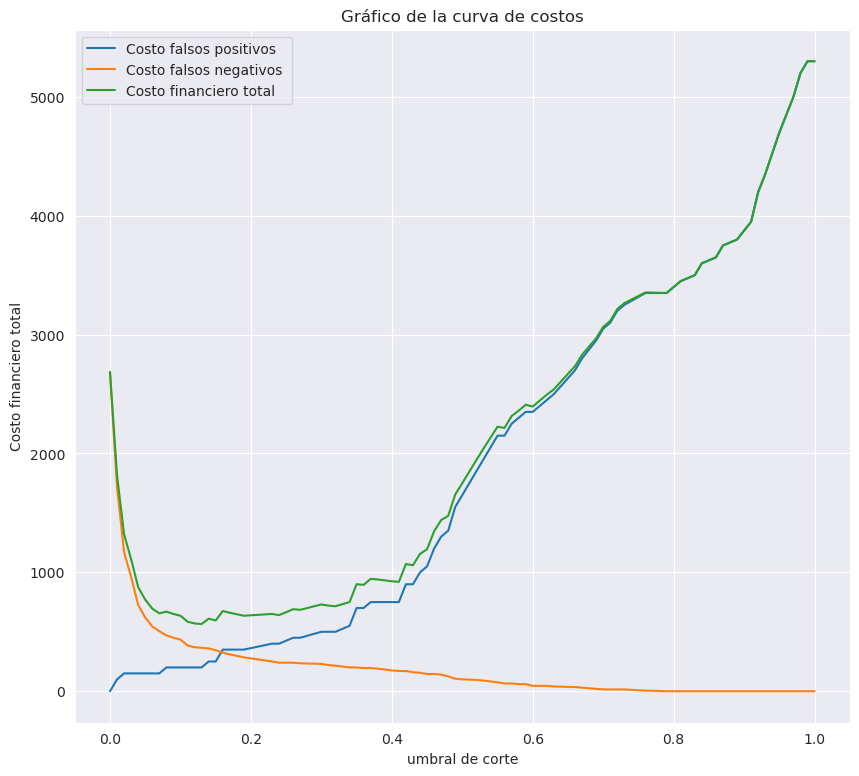

In [164]:
# Tercer caso : Cuando el costo de inculplimiento es diez veces el costo de perder un cliente
costo_bancario_total= [[costo_financiero_total(i,50,5)[z] for i in thresholds] for z in range(3)]
costo_bancario_total= np.array(costo_bancario_total)
#costo_bancario_total=[costo_financiero_total(i,50,5) for i in thresholds]
# Graficar la función
plt.figure(figsize=(10, 9))
plt.plot(thresholds, costo_bancario_total[1], label='Costo falsos positivos ')
plt.plot(thresholds, costo_bancario_total[2], label='Costo falsos negativos ')

plt.plot(thresholds, costo_bancario_total[0], label='Costo financiero total ')

#plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Pinta el área bajo la curva
plt.xlabel('umbral de corte')
plt.ylabel('Costo financiero total')
plt.title('Gráfico de la curva de costos')
plt.grid(True)
plt.legend()
plt.show()

# La ordenada correspondiente a la abcisa 0 del eje x corresponde a la politica más estricta de control. 
# La ordenada correspondiente a la abcisa 1 del eje x corresponde a la politica más permisiva.

In [165]:
Umbrales_de_costos= pd.concat([ pd.DataFrame(costo_bancario_total[0],columns=['Costo financiero total ']),pd.DataFrame(thresholds,columns=['Umbrales de corte'])],axis=1)

In [166]:
Umbrales_de_costos

,Costo financiero total,Umbrales de corte
0,5300,1.00
1,5300,0.99
2,5200,0.98
3,5000,0.97
4,4700,0.95
...,...,...
70,875,0.04
71,1110,0.03
72,1320,0.02
73,1815,0.01


In [167]:
# Encontramos el costo mínimo
Umbrales_de_costos['Costo financiero total '].min()

565

In [169]:
# Encontramos el umbral óptimo de corte en el que se logra el costo mínimo
Umbrales_de_costos[Umbrales_de_costos['Costo financiero total ']==565]

,Costo financiero total,Umbrales de corte
61,565,0.13


In [171]:
# Calcular métricas de evaluación de clasificación para el umbral óptimo según el esquema de costos del ejemplo
threshhold = 0.13
y_pred =np.where(probs>threshhold,1,0)
#y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
#thresholds[0]=1

In [172]:
datos_prueba = {
    "Métrica": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Valor": [accuracy, precision, recall, f1]
}

# Crear un DataFrame con las métricas
df = pd.DataFrame(datos_prueba,index=datos_prueba['Métrica'])

# Crear DataFrame a partir de la matriz de confusión
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Actual Positivo','Actual Negativo'], columns=['Predicción Positiva','Predicción Negativa'])

In [174]:
# Mostramos las métricas
np.round(df,2)

,Métrica,Valor
Accuracy,Accuracy,0.92
Precision,Precision,0.58
Recall,Recall,0.96
F1-Score,F1-Score,0.73


In [173]:
# Mostramos la matriz de confusión
df_conf_matrix

,Predicción Positiva,Predicción Negativa
Actual Positivo,821,73
Actual Negativo,4,102


En este caso, se está considerando una relación aún más desigual entre el costo de incumplimiento y el costo de perder un cliente. Aquí está la explicación detallada del código:

1. **Cálculo del costo financiero total para diferentes umbrales de corte:**
   Se utiliza la función `costo_financiero_total` para calcular el costo financiero total para una serie de umbrales de corte (`thresholds`). En esta ocasión, se establece que el costo de incumplimiento es diez veces mayor que el costo de perder un cliente. Esto significa que el costo asociado a un falso positivo es diez veces mayor que el costo asociado a un falso negativo. Se calcula el costo financiero total para cada umbral de corte utilizando la función `costo_financiero_total`.

2. **Graficar la función:**
   Se traza un gráfico de la función de costo financiero total en función del umbral de corte utilizando `plt.plot`. Los umbrales de corte se colocan en el eje x y los costos financieros totales se colocan en el eje y. Se utilizan las funciones `plt.xlabel`, `plt.ylabel` y `plt.title` para etiquetar los ejes y dar un título al gráfico.

3. **Interpretación del gráfico:**
   - La ordenada correspondiente a la abscisa 0 del eje x representa la política más estricta de control, donde se minimizan los falsos positivos a expensas de tener más falsos negativos. 
   - La ordenada correspondiente a la abscisa 1 del eje x representa la política más permisiva, donde se permiten más falsos positivos para evitar falsos negativos. 

Este código ofrece una visualización de cómo cambia el costo financiero total en función del umbral de corte, considerando una relación mucho más desigual entre el costo de incumplimiento y el costo de perder un cliente. Esto puede ayudar a entender cómo diferentes políticas de control, definidas por el umbral de corte, pueden influir en el costo financiero total en el contexto bancario.